We begin by importing the nash module. This contains all the important functions and it also loads the auxilliary functions.

In [22]:
import nash

Let us consider the following cone. Note how it is input with ray generators.

In [23]:
lis = [ [1,0,0,0], [0,1,0,0], [0,0,1,0], [1,1,1,3] ]
N = matrix(ZZ, lis).transpose();N

[1 0 0 1]
[0 1 0 1]
[0 0 1 1]
[0 0 0 3]

We can compute the normalized nash blowup using cone_normalized_nash_blowup(N). This function returns the exact cones of the operation.

In [24]:
nash.cone_normalized_nash_blowup(N)

[
[0 0 1 0]  [ 0  1  1 -1  0 -1]  [ 0  0  1  0  1  1  0]
[0 1 0 0]  [ 1  0  1 -1 -1  0]  [ 0  1  0  0  1  0  1]
[1 0 0 0]  [ 0  0  1  0  1  1]  [ 1  0  0  0  0  1  1]
[0 0 0 1], [ 0  0  3 -2  0  0], [ 0  0  0 -1  2  2  2],

[ 0  1  1  0 -1 -1]  [ 0  0  1  1  0  1]
[ 0  0  1  1  0  1]  [ 0  1  1  0 -1 -1]
[ 1  0  1 -1 -1  0]  [ 1  0  1 -1 -1  0]
[ 0  0  3  0 -2  0], [ 0  0  3  0 -2  0]
]

We can also clean the output by using the PALP normal form. This is implemented as cone_chi. Of the five above, there are only three up to isomorphism.

In [26]:
nash.cone_chi(N)

{[ 1  0  0  0  1  1  1]
 [ 0  1  0  1  0  0  1]
 [ 0  0  1  1  0  1  0]
 [ 0  0  0  2 -1  1  1],
 [ 1  0  0  1  2  1]
 [ 0  1  0  1  0  0]
 [ 0  0  1  0  1  1]
 [ 0  0  0  2  1 -1],
 [1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]}

The function cone_normalized_nash_tree(N) returns a directed graph consisting of the descendants of the cone N.

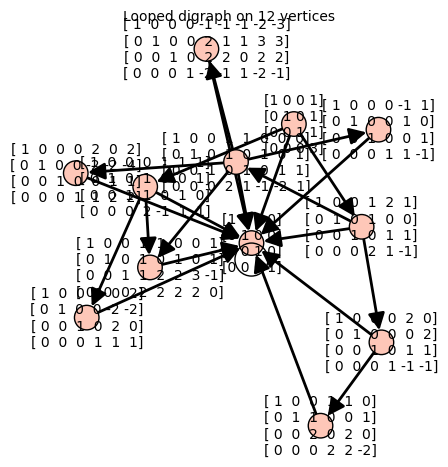

In [27]:
resolution_tree = nash.cone_normalized_nash_tree(N)
resolution_tree

Now we compute another Reeves cone. 

In [29]:
lis = [ [1,0,0,0], [0,1,0,0], [0,0,1,0], [1,1,1,5] ]
N = matrix(ZZ, lis).transpose();N
resolution_tree = nash.cone_normalized_nash_tree(N)
resolution_tree

Looped digraph on 165 vertices (use the .plot() method to plot)

Now we can ask for loops in the directed graph. Note that we will always have the trivial loop from the unimodular cone to itself.
But in this case we get another loop.

In [30]:
resolution_tree.loops()

[(
[1 0 0 0]  [1 0 0 0]      
[0 1 0 0]  [0 1 0 0]      
[0 0 1 0]  [0 0 1 0]      
[0 0 0 1], [0 0 0 1], None
),
 (
[ 1  0  0  0  2  1]  [ 1  0  0  0  2  1]      
[ 0  1  0  0  3  3]  [ 0  1  0  0  3  3]      
[ 0  0  1  0 -2 -1]  [ 0  0  1  0 -2 -1]      
[ 0  0  0  1 -1 -1], [ 0  0  0  1 -1 -1], None
)]

If we wish to check positive characteristic we have to give it as an input. The default is zero.

In [31]:
resolution_tree = nash.cone_normalized_nash_tree(N, Char=2)
resolution_tree

Looped digraph on 77 vertices (use the .plot() method to plot)

Same as above we can look for loops to find a different loop from above.

In [32]:
resolution_tree.loops()

[(
[1 0 0 0]  [1 0 0 0]      
[0 1 0 0]  [0 1 0 0]      
[0 0 1 0]  [0 0 1 0]      
[0 0 0 1], [0 0 0 1], None
),
 (
[1 0 1 0 0]  [1 0 1 0 0]      
[0 1 1 0 2]  [0 1 1 0 2]      
[0 0 2 0 2]  [0 0 2 0 2]      
[0 0 0 1 1], [0 0 0 1 1], None
)]

We do the same for characteristic 3 and discover no nontrivial loops.

In [33]:
resolution_tree = nash.cone_normalized_nash_tree(N, Char=3)
resolution_tree.loops()

[(
[1 0 0 0]  [1 0 0 0]      
[0 1 0 0]  [0 1 0 0]      
[0 0 1 0]  [0 0 1 0]      
[0 0 0 1], [0 0 0 1], None
)]

However we can look for longer cycles. For SageMath to look for cycles it is convenient to delete the loops and then we can use the function that finds the longest cycle (this requires no loops)

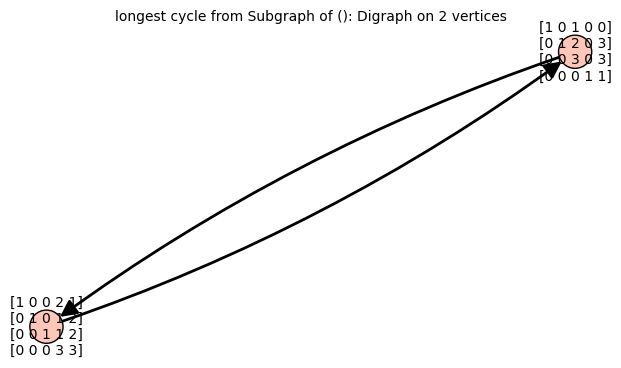

In [34]:
resolution_tree.allow_loops(False)
resolution_tree.longest_cycle()

Now we switch to semigroups. For a simple demonstration let us consider the semigroup of Example 14 associated to the Whitney Umbrella

In [35]:
lis = [ [2,0], [1,1], [0,1] ]
N = matrix(ZZ, lis).transpose();N

[2 1 0]
[0 1 1]

We can compute the nash blowup. The function returns the resulting pointed semigroups as in the paper.

In [36]:
nash.semig_nash_blowup(N)

[
[ 0  1]  [ 1 -1]
[ 1 -1], [ 0  1]
]

We have implemented the PALP normal form to obtain unimodularly equivalent semigroups. If we apply the function $\chi$ from the paper we have to apply this *standard* form  to each semigroup in the blowup, for the above example it turns out they are both isomorphic to the unique unimodular semigroup

In [37]:
nash.semig_chi(N)

{[0 1]
 [1 0]}

Now we do an example with semigroups. We input the generators

In [45]:
lis = [ [1,0,0,0], [0,1,0,0], [0,0,1,0], [0,0,0,1], [1,1,1,-3] ]
N = matrix(ZZ, lis).transpose();N

[ 1  0  0  0  1]
[ 0  1  0  0  1]
[ 0  0  1  0  1]
[ 0  0  0  1 -3]

As before we ask for the resolution tree but we have to call the semig version. Also, in this case the characteristic is always zero. The semigroup functions are more involved and thus take longer.

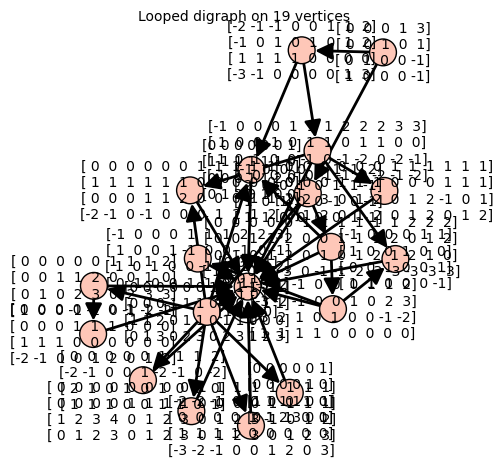

In [46]:
resolution_tree=nash.semig_nash_tree(N)
resolution_tree

In [47]:
resolution_tree.loops()

[(
[0 0 0 1]  [0 0 0 1]      
[0 0 1 0]  [0 0 1 0]      
[0 1 0 0]  [0 1 0 0]      
[1 0 0 0], [1 0 0 0], None
)]

In [48]:
resolution_tree.allow_loops(False)
resolution_tree.longest_cycle()

longest cycle: Digraph on 0 vertices (use the .plot() method to plot)

We conclude there are no loops and no cycles in the above example.

Now we input the semigroup that creates a loop.

In [10]:
lis=[[1, 0, 0, -2, 1, 2],
 [0, 1, 0, -1, -1, -2],
 [0, 0, 1, 2, 1, 1]]
N = matrix(ZZ, lis,immutable=True);N

[ 1  0  0 -2  1  2]
[ 0  1  0 -1 -1 -2]
[ 0  0  1  2  1  1]

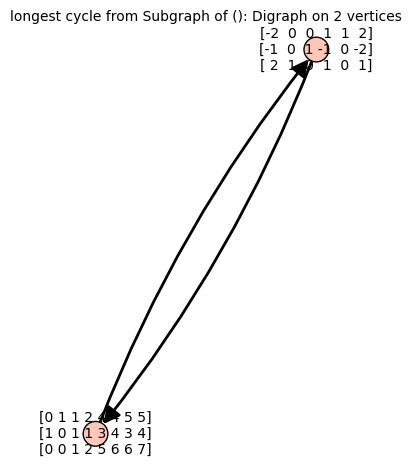

In [11]:
resolution_tree=nash.semig_nash_tree(N)
resolution_tree.allow_loops(False)
resolution_tree.longest_cycle()